# Map of surface concentrations

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import netCDF4 as nc

%matplotlib inline

###### Parameters:

In [61]:
imin, imax = 1479, 2179
jmin, jmax = 159, 799
isize = imax - imin
jsize = jmax - jmin

# model results:
year = 2015
# results_folder1 = f'/data/brogalla/run_storage/Mn-reference-202110/ANHA12_ref-{year}_20211012/'
results_folder1 = f'/data/brogalla/run_storage/Mn-spm-202110/ANHA12_spm-{year}_20211026/'

In [62]:
stn_i = np.array([104, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629])
stn_j = np.array([370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471])
stn_n = np.array(['CAA1','CAA2','CAA3','CAA4','CAA5','CAA6','CAA7',
                  'CAA8','CAA9', 'CB1','CB2','CB3','CB4'])

###### Load files:

In [63]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [64]:
results1   = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc')
dissolmn1  = np.array(results1.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn1  = np.array(results1.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units
lons_model = np.array(results1.variables['nav_lon'])
lats_model = np.array(results1.variables['nav_lat'])
depth      = np.array(results1.variables['deptht'])

##### Functions:

In [65]:
def plot_layer(month, layer, variable, vmin=0,vmax=35, savefig=False):
    
    plot_var = variable[month,layer,:,:]
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

    x, y = proj1(lons_model, lats_model)

    pcolor  = proj1.pcolormesh(x, y, plot_var, cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax)
    contour = proj1.contourf(np.zeros_like(x), np.zeros_like(y), np.zeros_like(plot_var), np.arange(vmin,vmax+1,1),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

    # Outline subset area for profile
#     i  = 608;   j  = 418;
#     di = 30;    dj = 30;
    i  = 608;   j  = 358;
    di = 30;    dj = 30;
    proj1.plot(x[i-di:i+di,j-dj], y[i-di:i+di,j-dj], '--w', linewidth=1.0, zorder=3)
    proj1.plot(x[i-di:i+di,j+dj], y[i-di:i+di,j+dj], '--w', linewidth=1.0, zorder=3)
    proj1.plot(x[i-di,j-dj:j+dj], y[i-di,j-dj:j+dj], '--w', linewidth=1.0, zorder=3)
    proj1.plot(x[i+di,j-dj:j+dj], y[i+di,j-dj:j+dj], '--w', linewidth=1.0, zorder=3)

    cbar_ax = fig.add_axes([0.77, 0.25, 0.04, 0.5])
    cbar    = fig.colorbar(contour, cax=cbar_ax)
    cbar.set_label('Dissolved Mn [nM]', fontsize=6) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=6)
      
    if savefig:
        fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S12-surface-fields-January.png', \
                       bbox_inches='tight', dpi=300)
        fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S12-surface-fields-January.svg', \
                       bbox_inches='tight', dpi=300, format='svg')
    
    return

##### Figures of surface concentrations:

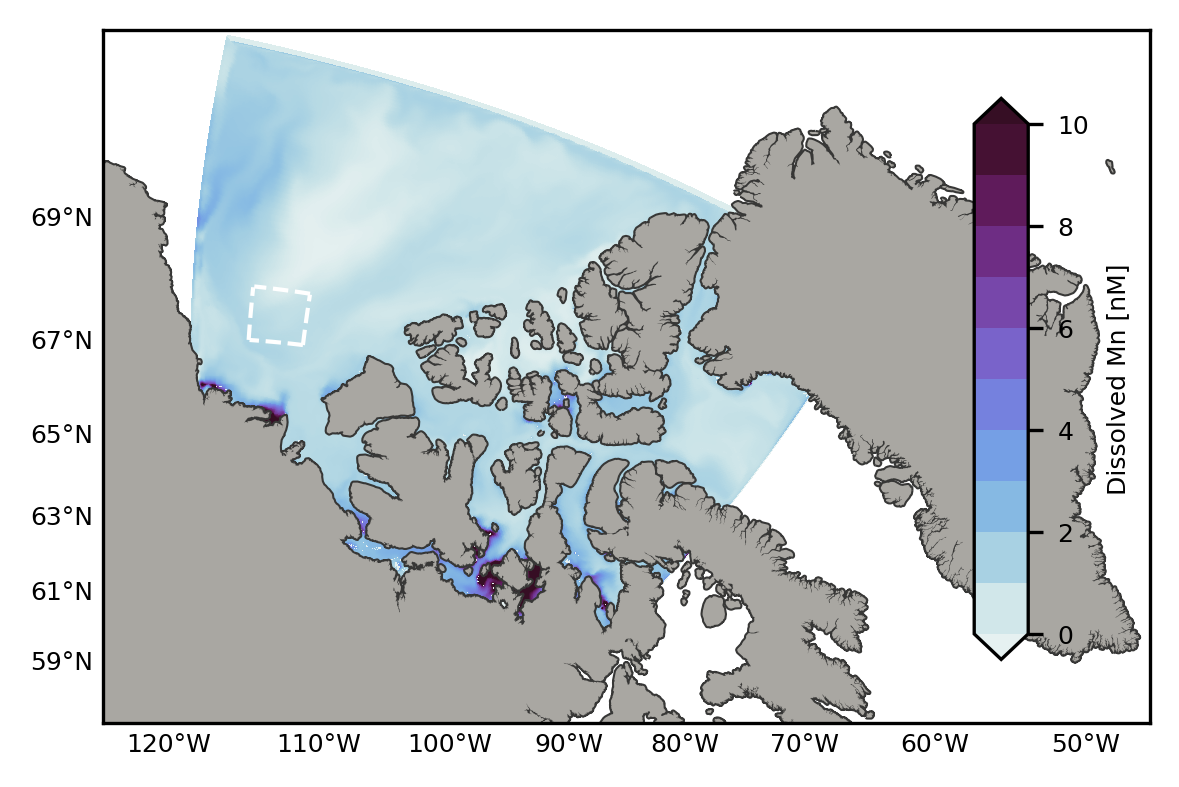

In [49]:
plot_layer(0,0,dissolmn1,vmin=0,vmax=10, savefig=False)

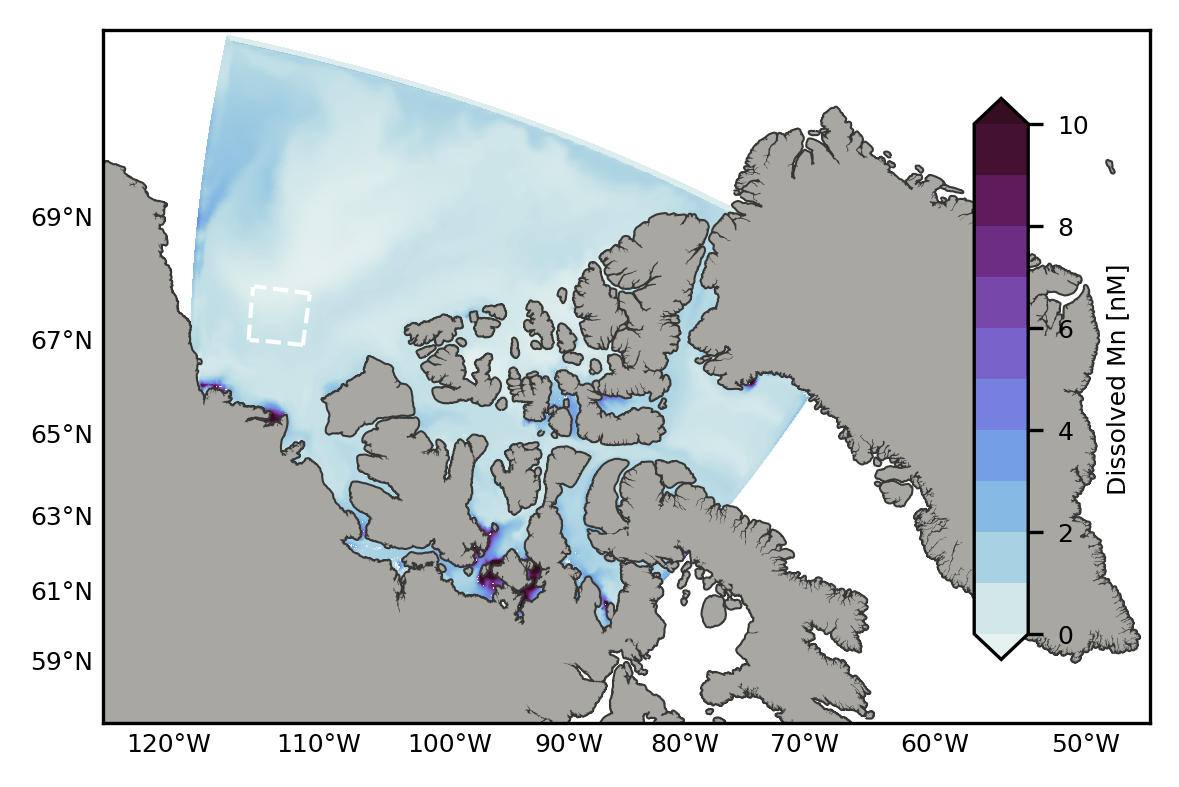

In [50]:
plot_layer(2,0,dissolmn1,vmin=0,vmax=10, savefig=False)

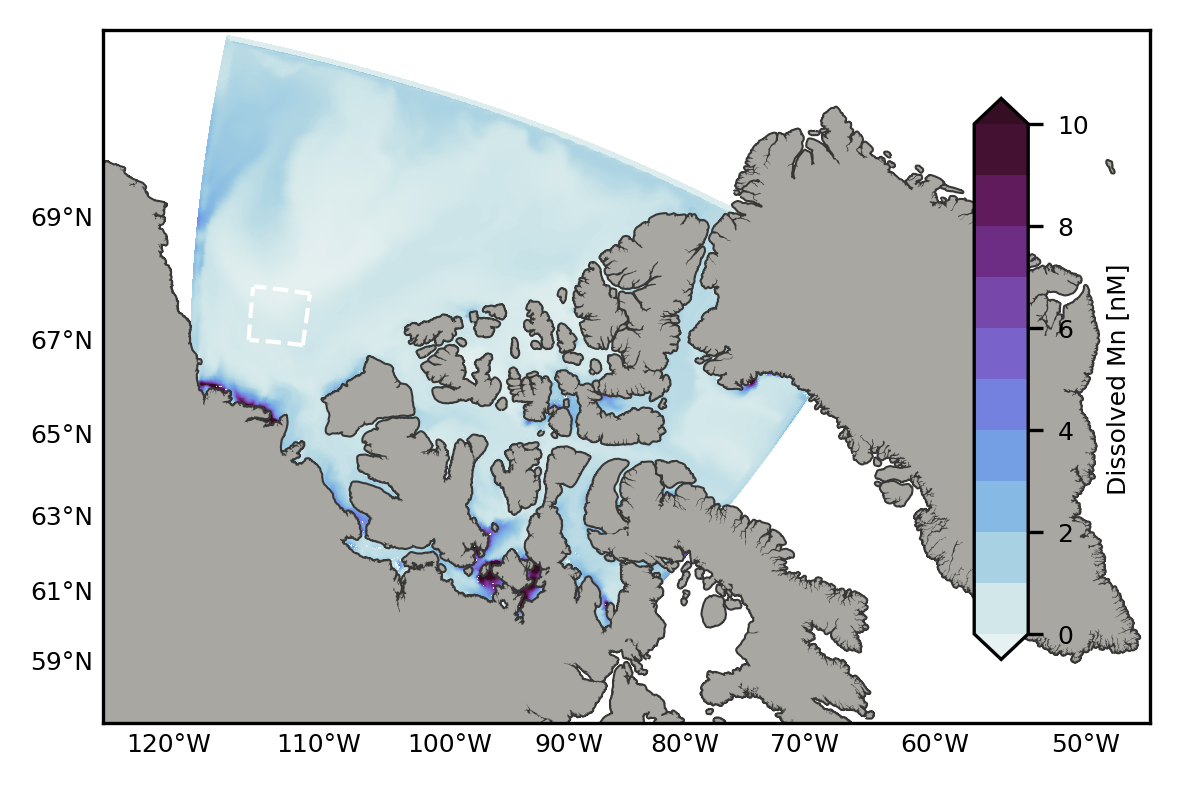

In [51]:
plot_layer(3,0,dissolmn1,vmin=0,vmax=10, savefig=False)

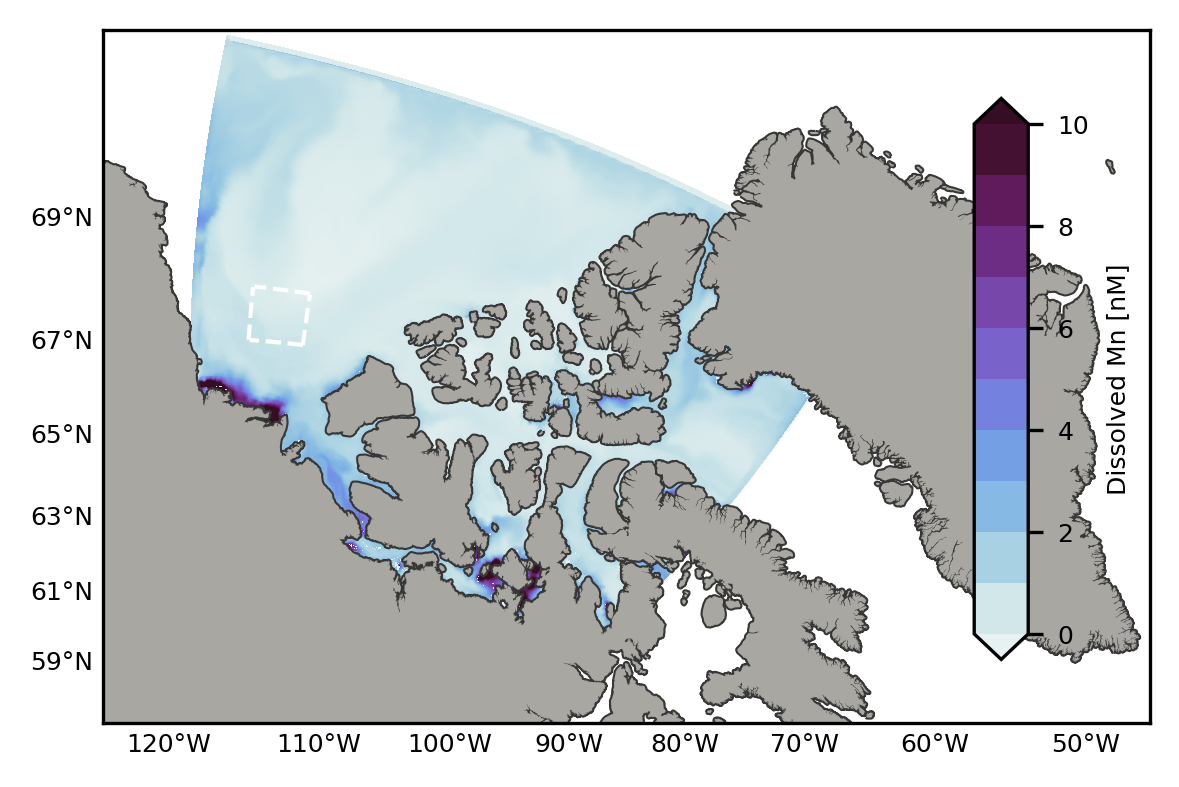

In [52]:
plot_layer(4,0,dissolmn1,vmin=0,vmax=10, savefig=False)

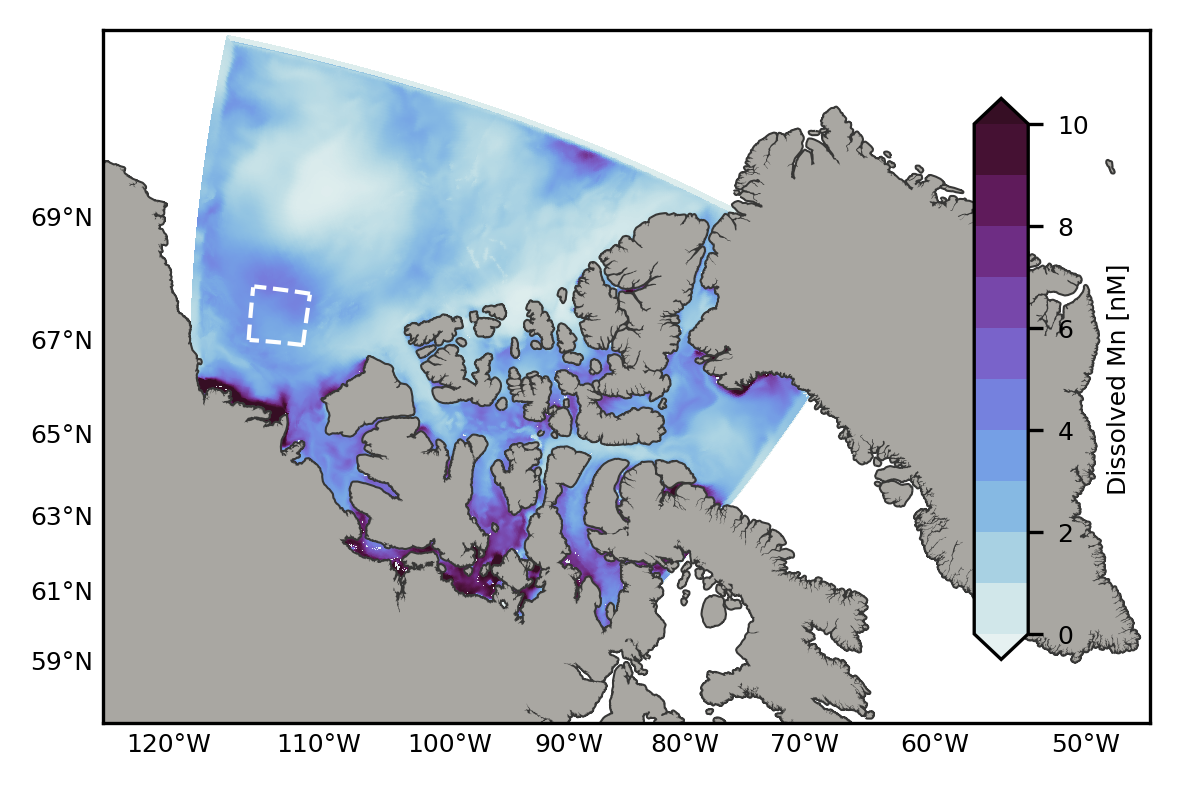

In [53]:
plot_layer(5,0,dissolmn1,vmin=0,vmax=10, savefig=False)

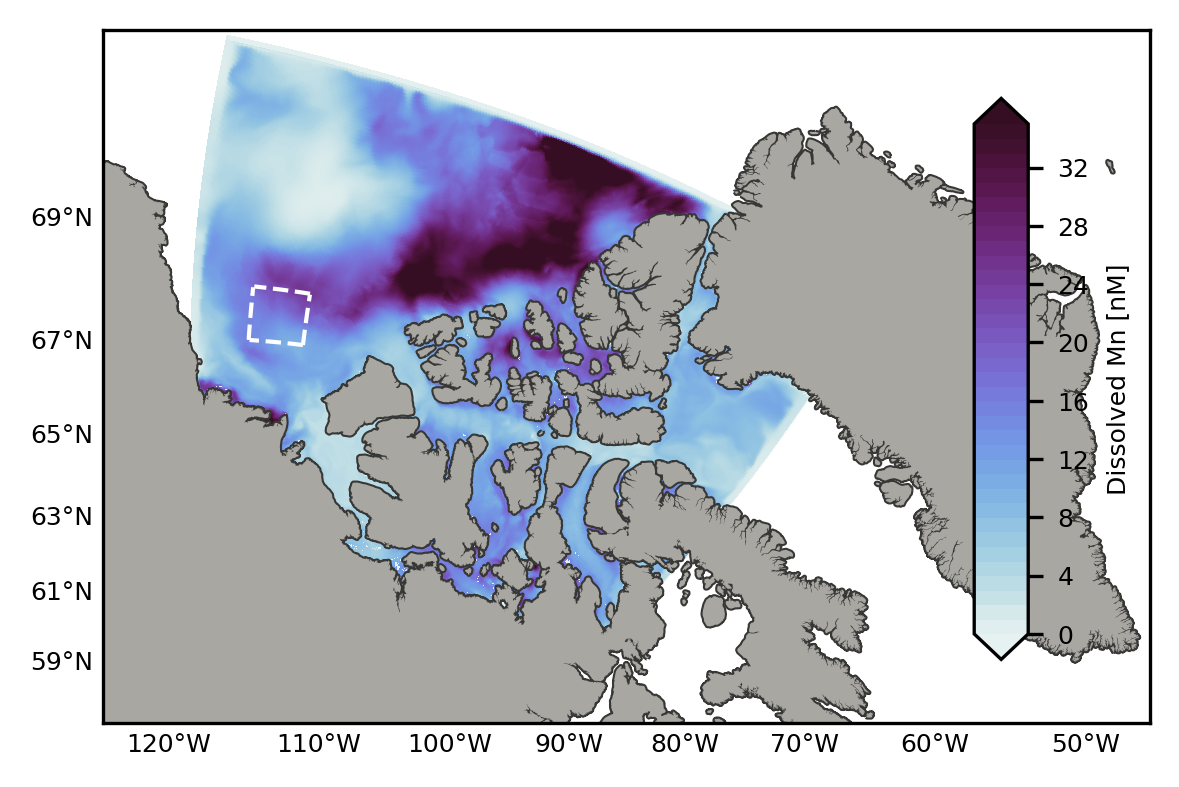

In [54]:
plot_layer(6,0,dissolmn1,vmin=0,vmax=35, savefig=False)

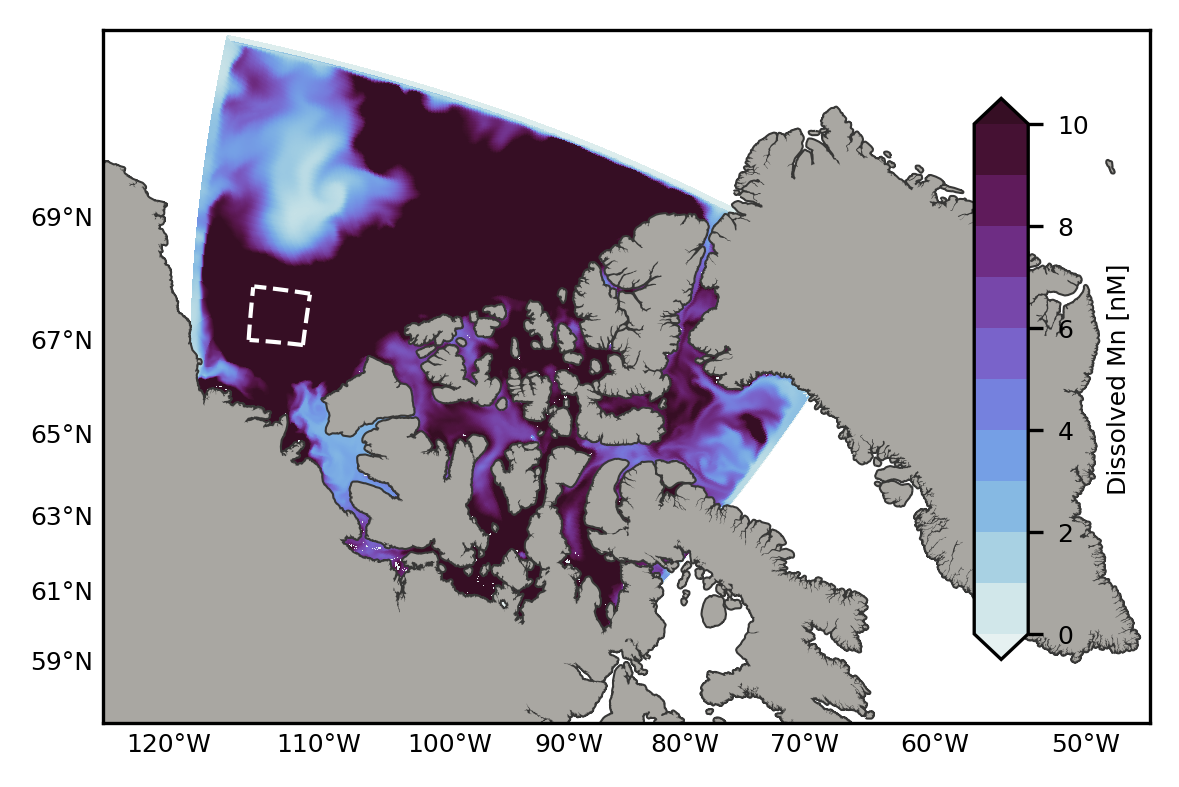

In [60]:
plot_layer(7,0,dissolmn1,vmin=0,vmax=10, savefig=False)

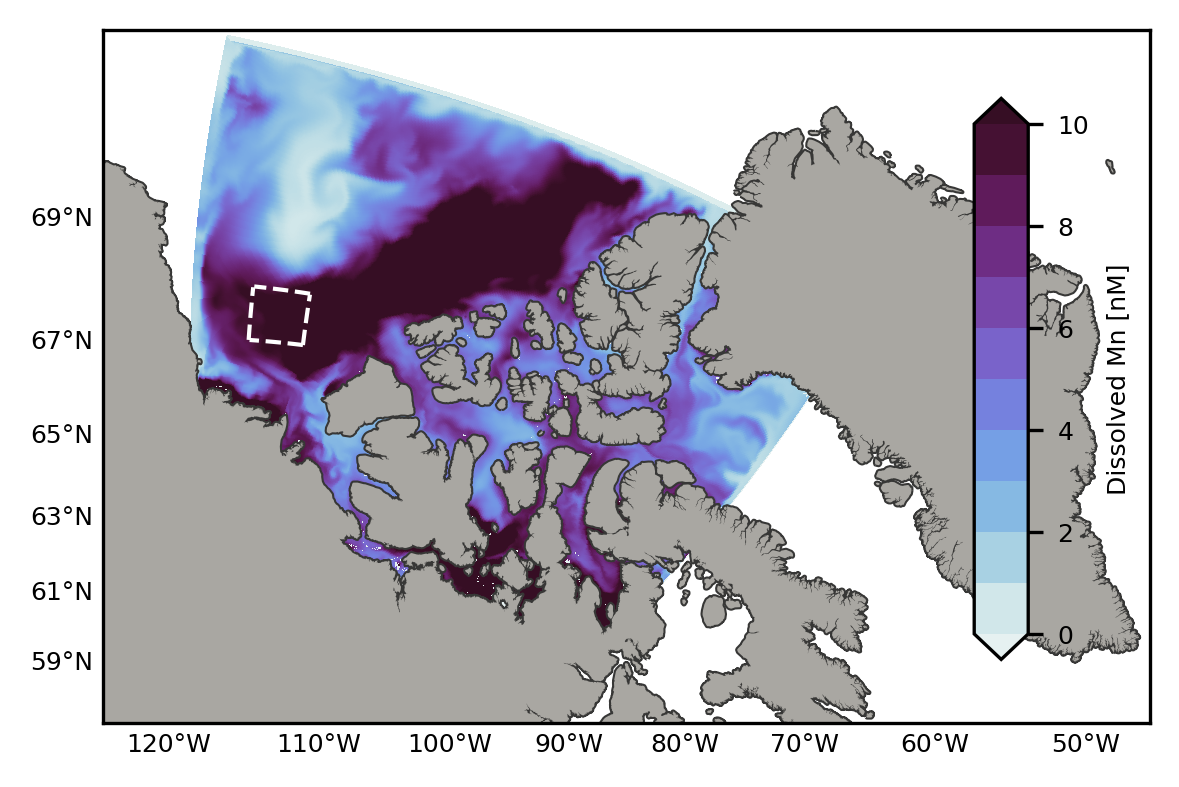

In [56]:
plot_layer(8,0,dissolmn1,vmin=0,vmax=10, savefig=False)

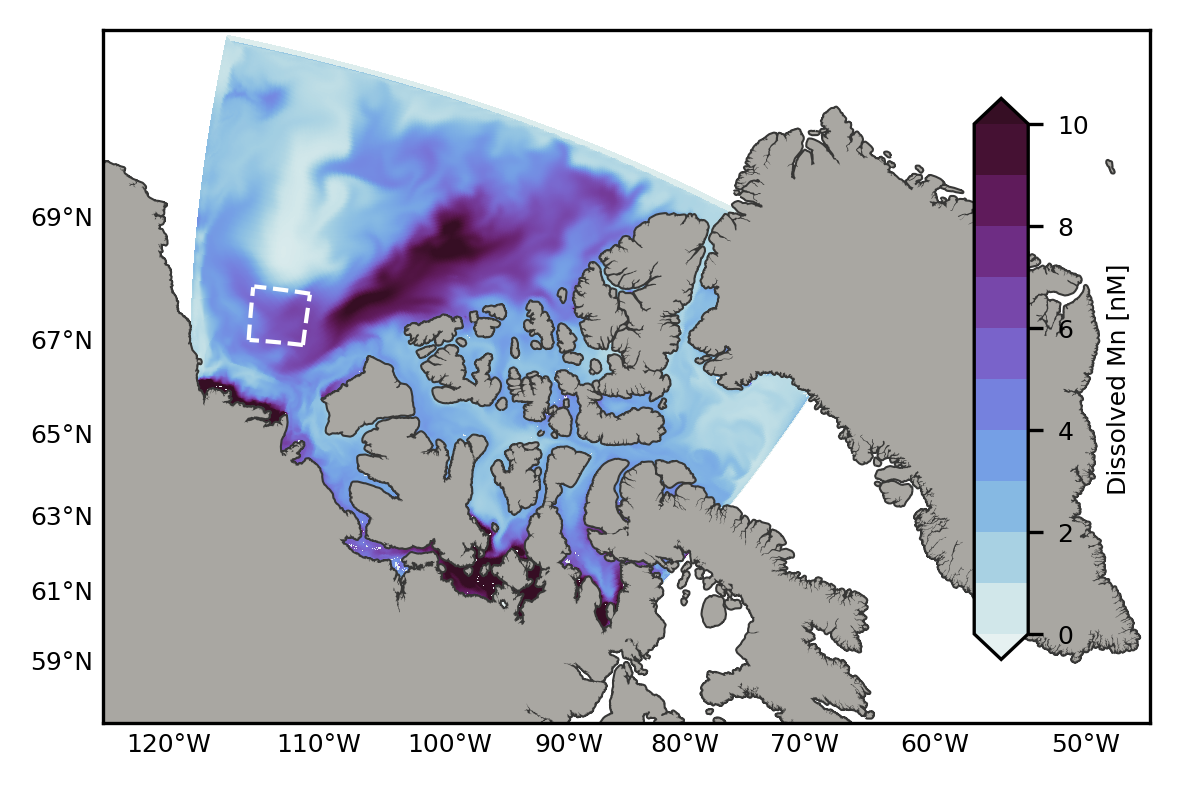

In [57]:
plot_layer(9,0,dissolmn1,vmin=0,vmax=10, savefig=False)

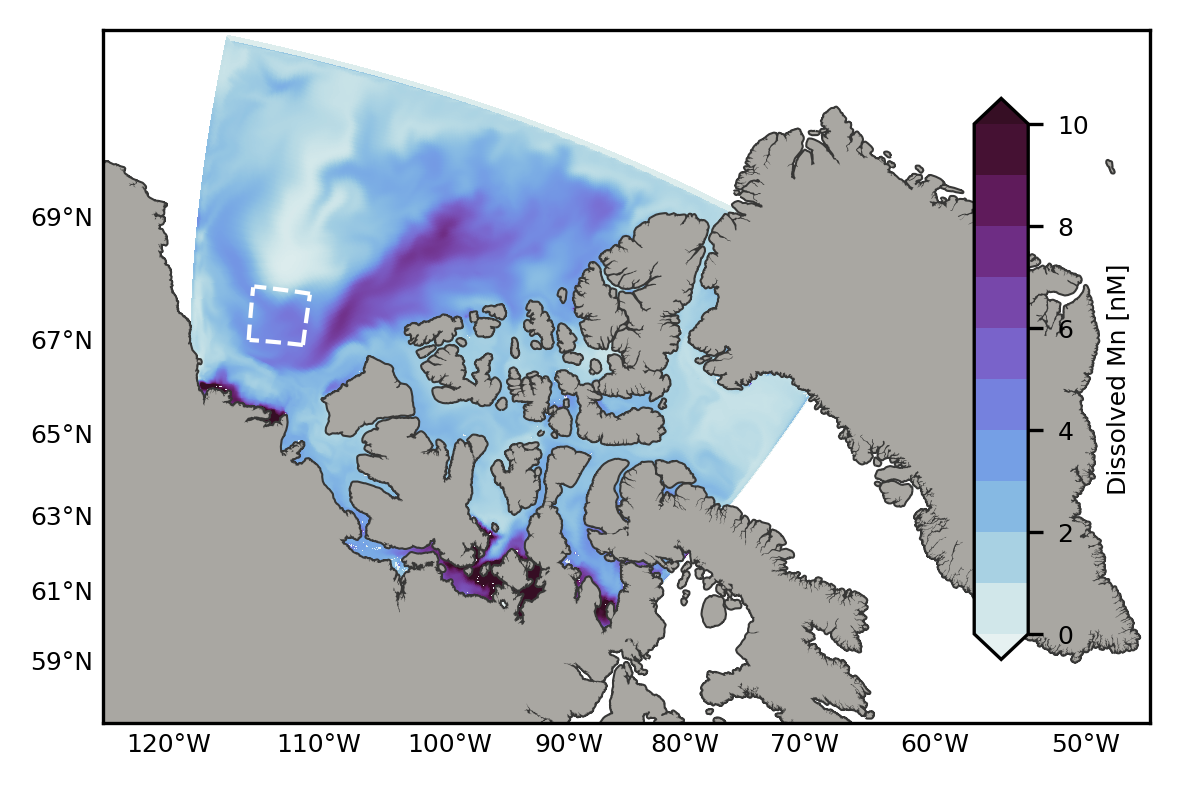

In [58]:
plot_layer(10,0,dissolmn1,vmin=0,vmax=10, savefig=False)

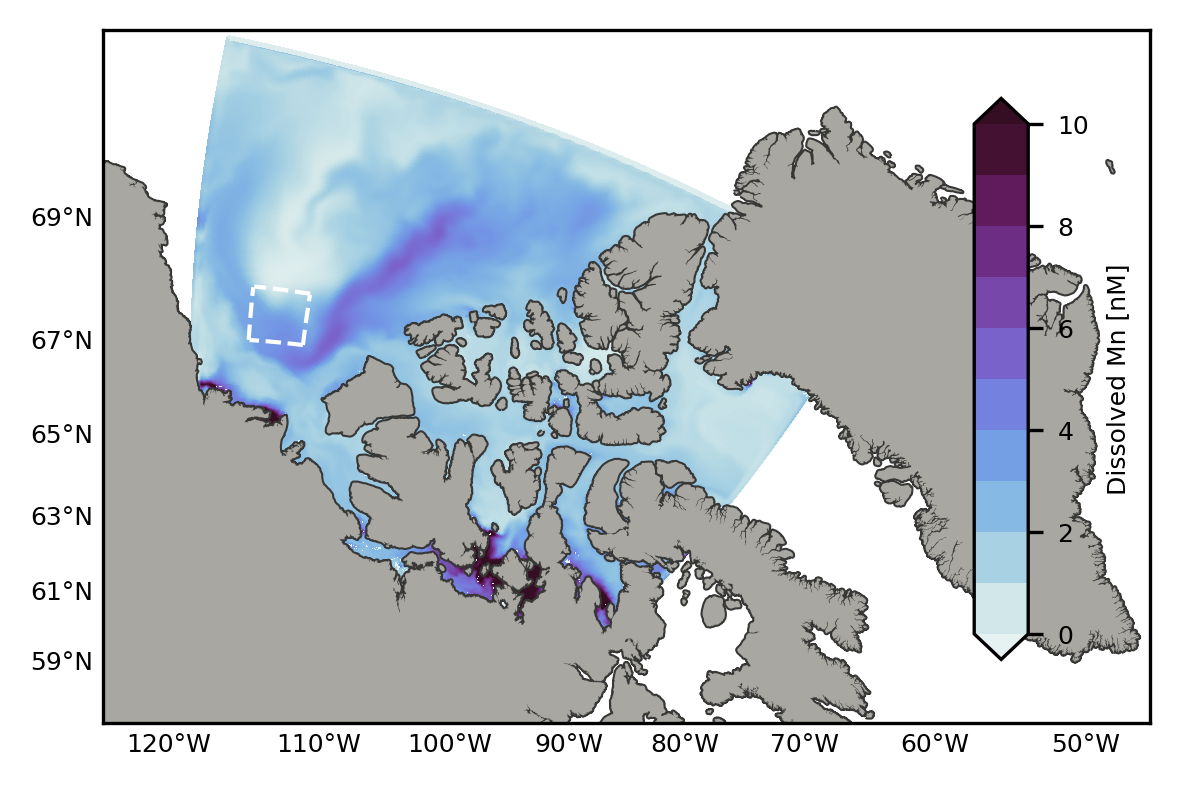

In [59]:
plot_layer(11,0,dissolmn1,vmin=0,vmax=10, savefig=False)

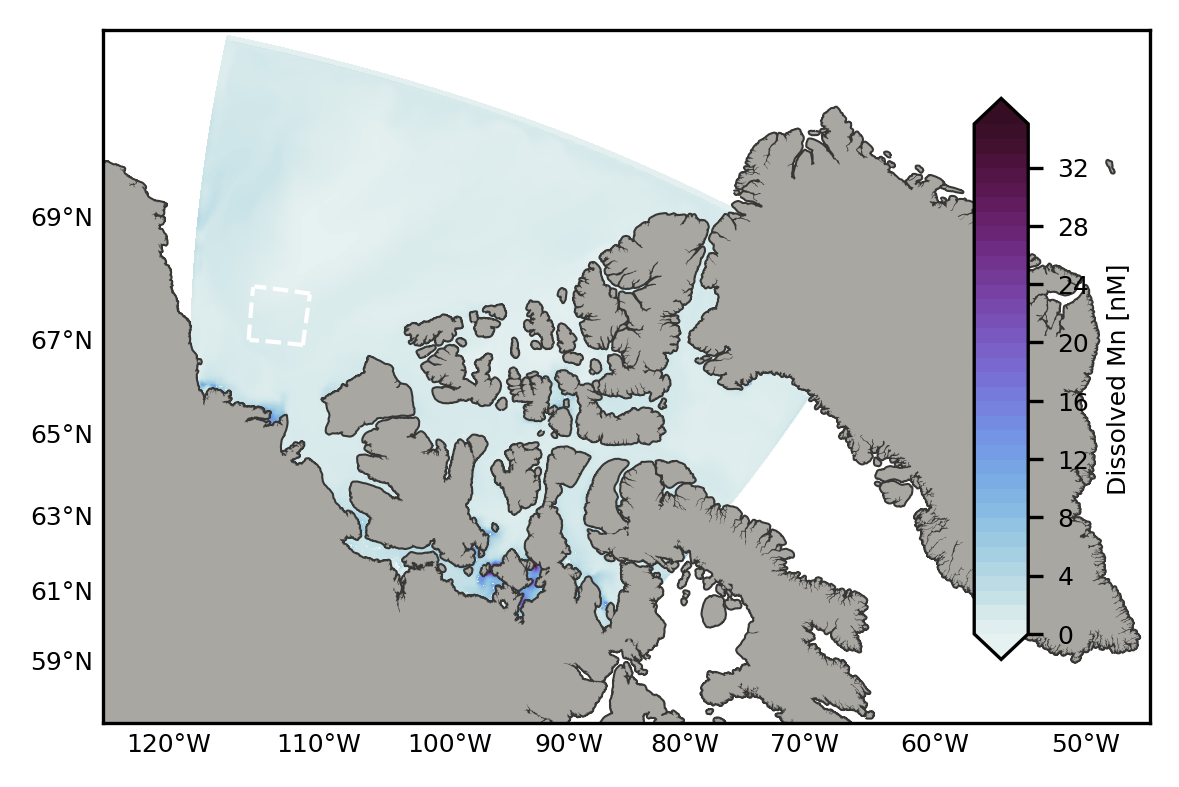

In [37]:
plot_layer(0,0,dissolmn1,vmin=0,vmax=35, savefig=True)

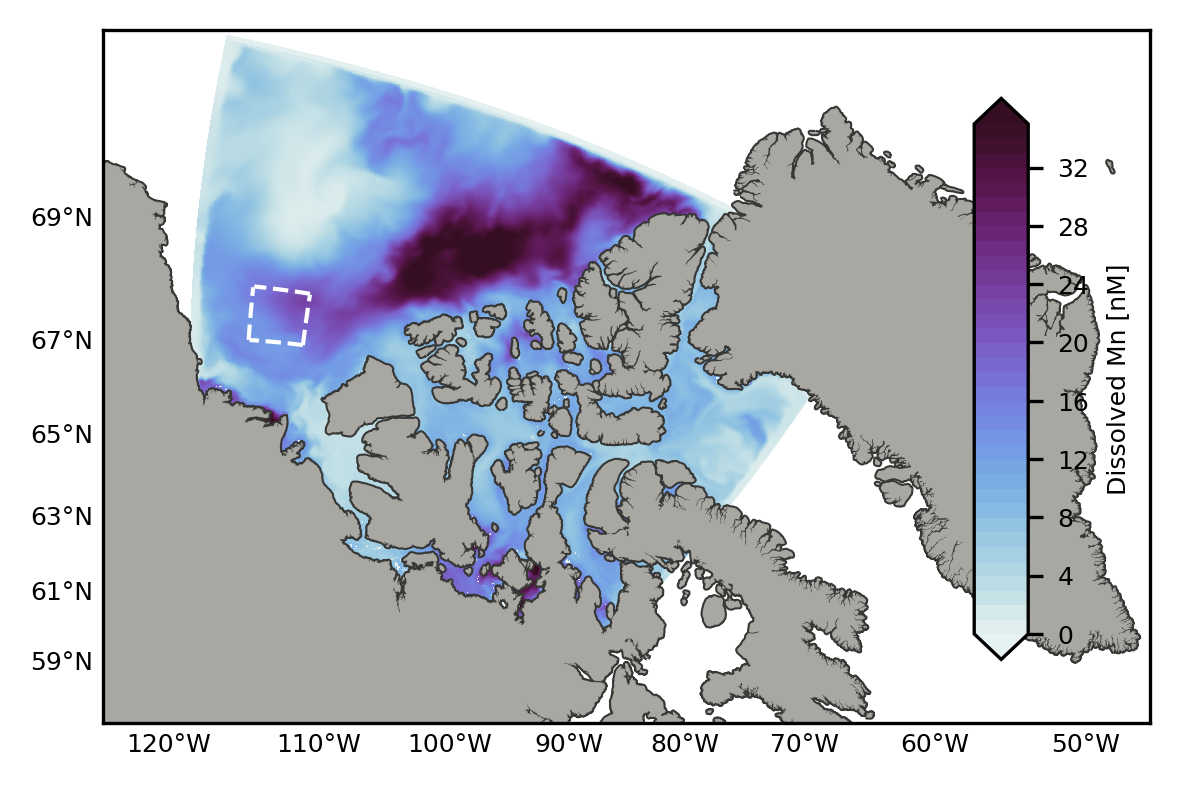

In [35]:
plot_layer(7,0,dissolmn1,vmin=0,vmax=35, savefig=True)

Canada Basin surface profile

In [38]:
month=6
i  = 608
j  = 358
di = 30
dj = 30

dmn = dissolmn1[month,:,i-di:i+di,j-dj:j+dj].mean(axis=(1,2))

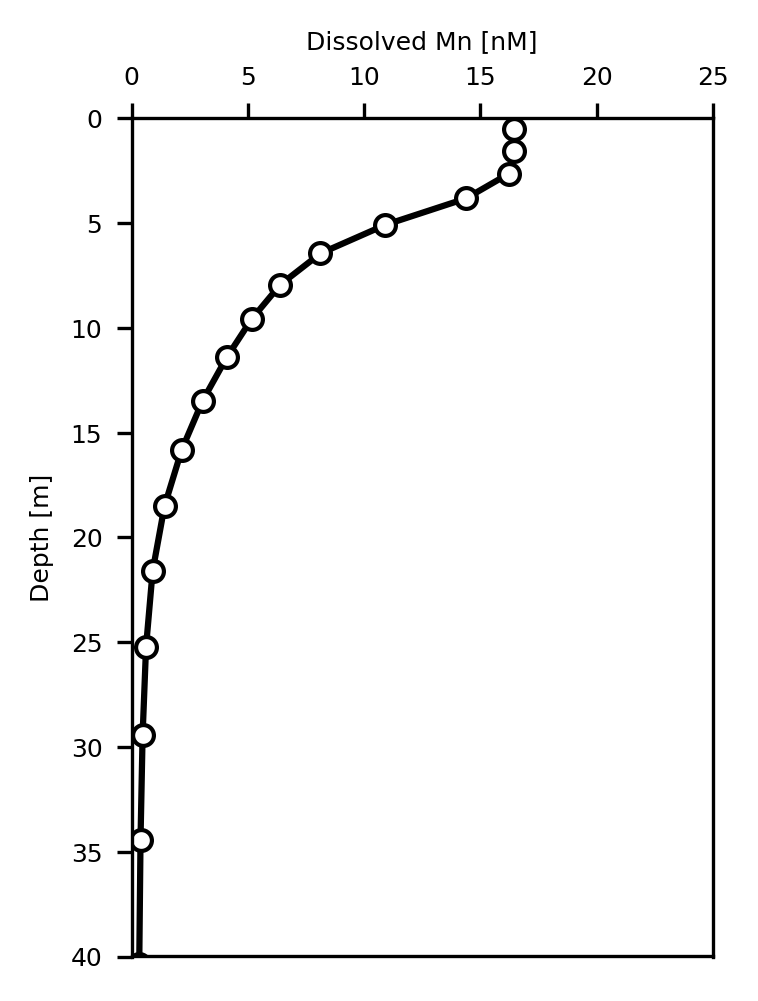

In [39]:
fig, ax = plt.subplots(1,1, figsize=(2.5, 3.7), dpi=300)

ax.invert_yaxis()
ax.plot(dmn, depth, '-k')
ax.plot(dmn, depth, '.w', markersize=10, markeredgecolor='k')

ax.set_xlabel('Dissolved Mn [nM]', fontsize=6)
ax.set_ylabel('Depth [m]', fontsize=6)
ax.set_xlim(0,25)
ax.set_ylim(40,0)
ax.tick_params(axis='both', labelsize=6)
ax.xaxis.tick_top()    
ax.xaxis.set_label_position('top') 
    
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S11-profile.png', \
               bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202110/S11-profile.svg', \
               bbox_inches='tight', dpi=300, format='svg')